In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [98]:
data = pd.read_csv('neo.csv')
print(f'Data shape: {data.shape}')
data.head()

Data shape: (90836, 10)


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [165]:
data.describe(include='all')

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,9.083600e+04,90836,90836.000000,90836.000000,90836.000000,9.083600e+04,90836,90836,90836.000000,90836
unique,NaN,27423,NaN,NaN,NaN,NaN,1,1,NaN,2
top,NaN,469219 Kamo`oalewa (2016 HO3),NaN,NaN,NaN,NaN,Earth,False,NaN,False
freq,NaN,43,NaN,NaN,NaN,NaN,90836,90836,NaN,81996
mean,1.438288e+07,NaN,0.127432,0.284947,48066.918918,3.706655e+07,NaN,NaN,23.527103,NaN
std,2.087202e+07,NaN,0.298511,0.667491,25293.296961,2.235204e+07,NaN,NaN,2.894086,NaN
min,2.000433e+06,NaN,0.000609,0.001362,203.346433,6.745533e+03,NaN,NaN,9.230000,NaN
25%,3.448110e+06,NaN,0.019256,0.043057,28619.020645,1.721082e+07,NaN,NaN,21.340000,NaN
50%,3.748362e+06,NaN,0.048368,0.108153,44190.117890,3.784658e+07,NaN,NaN,23.700000,NaN
75%,3.884023e+06,NaN,0.143402,0.320656,62923.604633,5.654900e+07,NaN,NaN,25.700000,NaN


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'est_diameter_min'}>],
       [<AxesSubplot:title={'center':'est_diameter_max'}>,
        <AxesSubplot:title={'center':'relative_velocity'}>],
       [<AxesSubplot:title={'center':'miss_distance'}>,
        <AxesSubplot:title={'center':'absolute_magnitude'}>]],
      dtype=object)

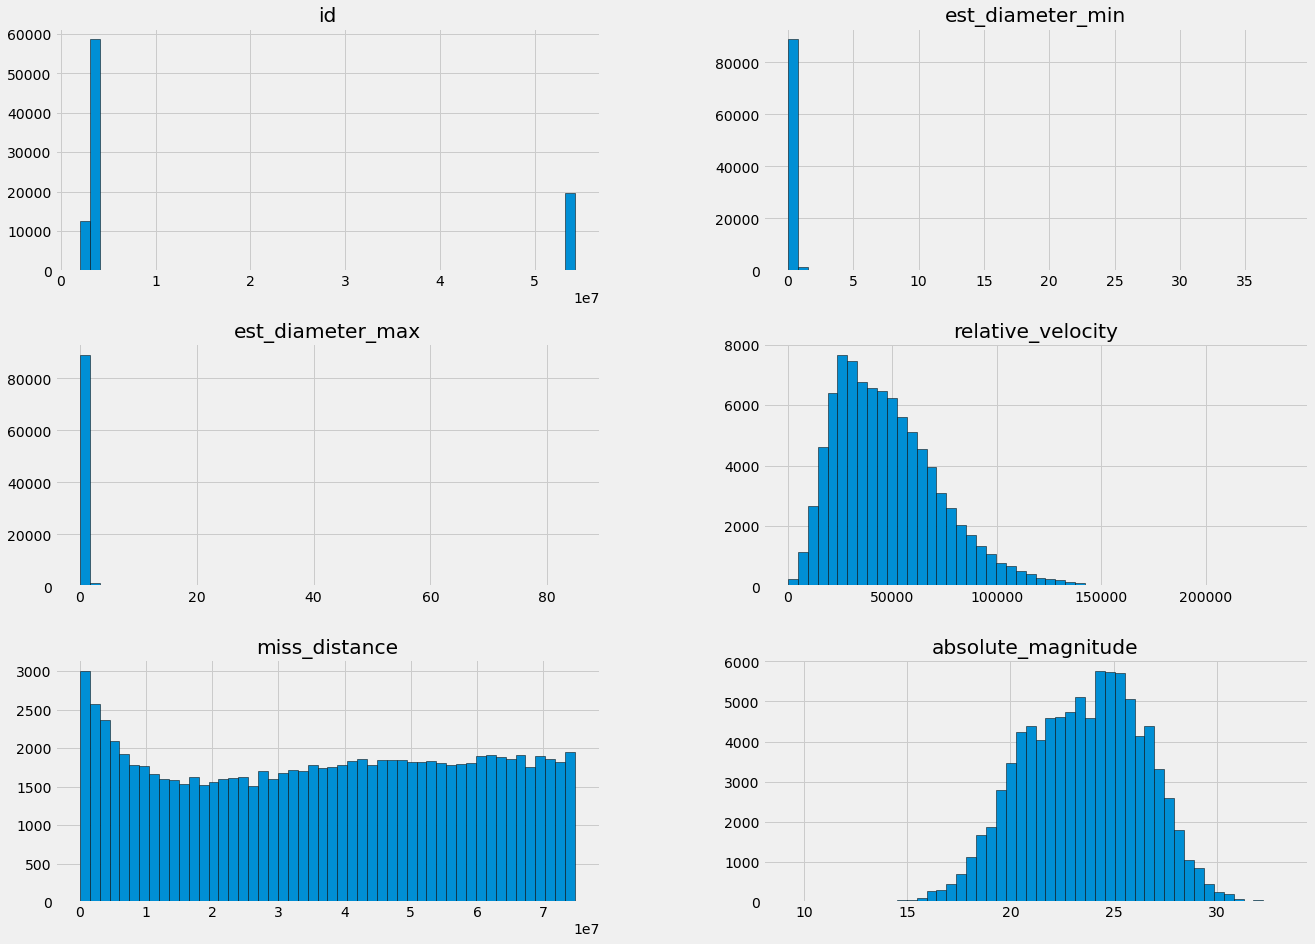

In [101]:
data.hist(figsize=(20,15), bins=50, edgecolor='k')

Text(0.5, 1.0, 'Distribution of TARGET')

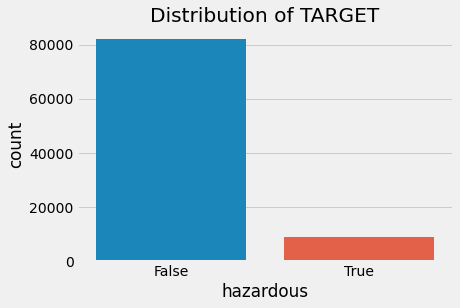

In [102]:
sns.countplot(data['hazardous'])
plt.title('Distribution of TARGET')

Create a test set

In [103]:
X = data.drop(columns=['hazardous'])
y = data['hazardous']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
earth_train = X_train.copy()
earth_train['TARGET'] = y_train
earth_test = y_test.copy()
earth_test['TARGET'] = y_test

# Explore the data

In [104]:
# Copy the data
train = earth_train.copy()

# Change True False in the TARGET to 0 and 1
train['TARGET'] = train['TARGET'].apply(lambda x: 0 if x==False else 1)

Text(0.5, 1.0, 'TARGET distribution of Training set')

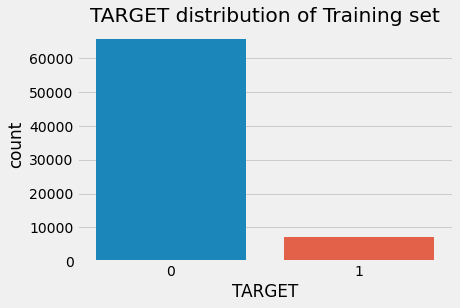

In [105]:
# Get the distribution of the target
sns.countplot(train['TARGET'])
plt.title('TARGET distribution of Training set')

### Examine missing values

In [106]:
def missing_values_table(df):
    # Total missing value
    mis_val = df.isnull().sum()

    # Percentage of missing value
    mis_val_percent = df.isnull().sum()/len(df) * 100

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}
    )

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            by='% of Total Values', ascending=False
        )
    
    # Print some summary information
    print(f"Your selected dataframe has {df.shape[1]} columns")
    print(f"There are {mis_val_table_ren_columns.shape[0]} with missing values")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [107]:
missing_values_table(train)

Your selected dataframe has 10 columns
There are 0 with missing values


,Missing Values,% of Total Values


### Check the column types

In [108]:
# Number of each type of column
train.dtypes.value_counts()

float64    5
int64      2
object     2
bool       1
dtype: int64

In [109]:
train.select_dtypes('object')

,name,orbiting_body
2639,(2013 GT66),Earth
29138,(2021 JU1),Earth
36927,(2018 VQ3),Earth
61855,(2017 DJ34),Earth
15916,(2018 KS),Earth
...,...,...
29491,(2018 RR1),Earth
18373,(2015 WY1),Earth
25031,(2018 FE3),Earth
35456,(2008 TR10),Earth


### Anamolies

In [110]:
train.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,TARGET
count,7.266800e+04,72668.000000,72668.000000,72668.000000,7.266800e+04,72668.000000,72668.000000
mean,1.439463e+07,0.128198,0.286658,48056.341395,3.709139e+07,23.525409,0.097319
std,2.088031e+07,0.313486,0.700976,25257.037962,2.235471e+07,2.898315,0.296394
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000,0.000000
25%,3.448962e+06,0.019256,0.043057,28632.338106,1.720310e+07,21.340000,0.000000
50%,3.748365e+06,0.048368,0.108153,44244.808278,3.789466e+07,23.700000,0.000000
75%,3.884239e+06,0.143402,0.320656,62906.940878,5.658472e+07,25.700000,0.000000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000,1.000000


`est_diameter_min` and `est_diameter_max` do not look right

In [111]:
def distplot(df, var, bins, scale=False):
    plt.figure(figsize = (20,15))
    # iterate through the sources

    for i, source in enumerate(var):
        # create a new subplot for each source
        plt.subplot(len(var),1,i+1)

        # Draw the plot
        plt.hist(df[source], bins=bins, edgecolor='k')

        # Adjust the scale of y to log
        if scale==True:
            plt.yscale('log')
        
        # Label the plots
        plt.title(f'Distribution of {source}')
        
    plt.tight_layout(h_pad = 3.5)


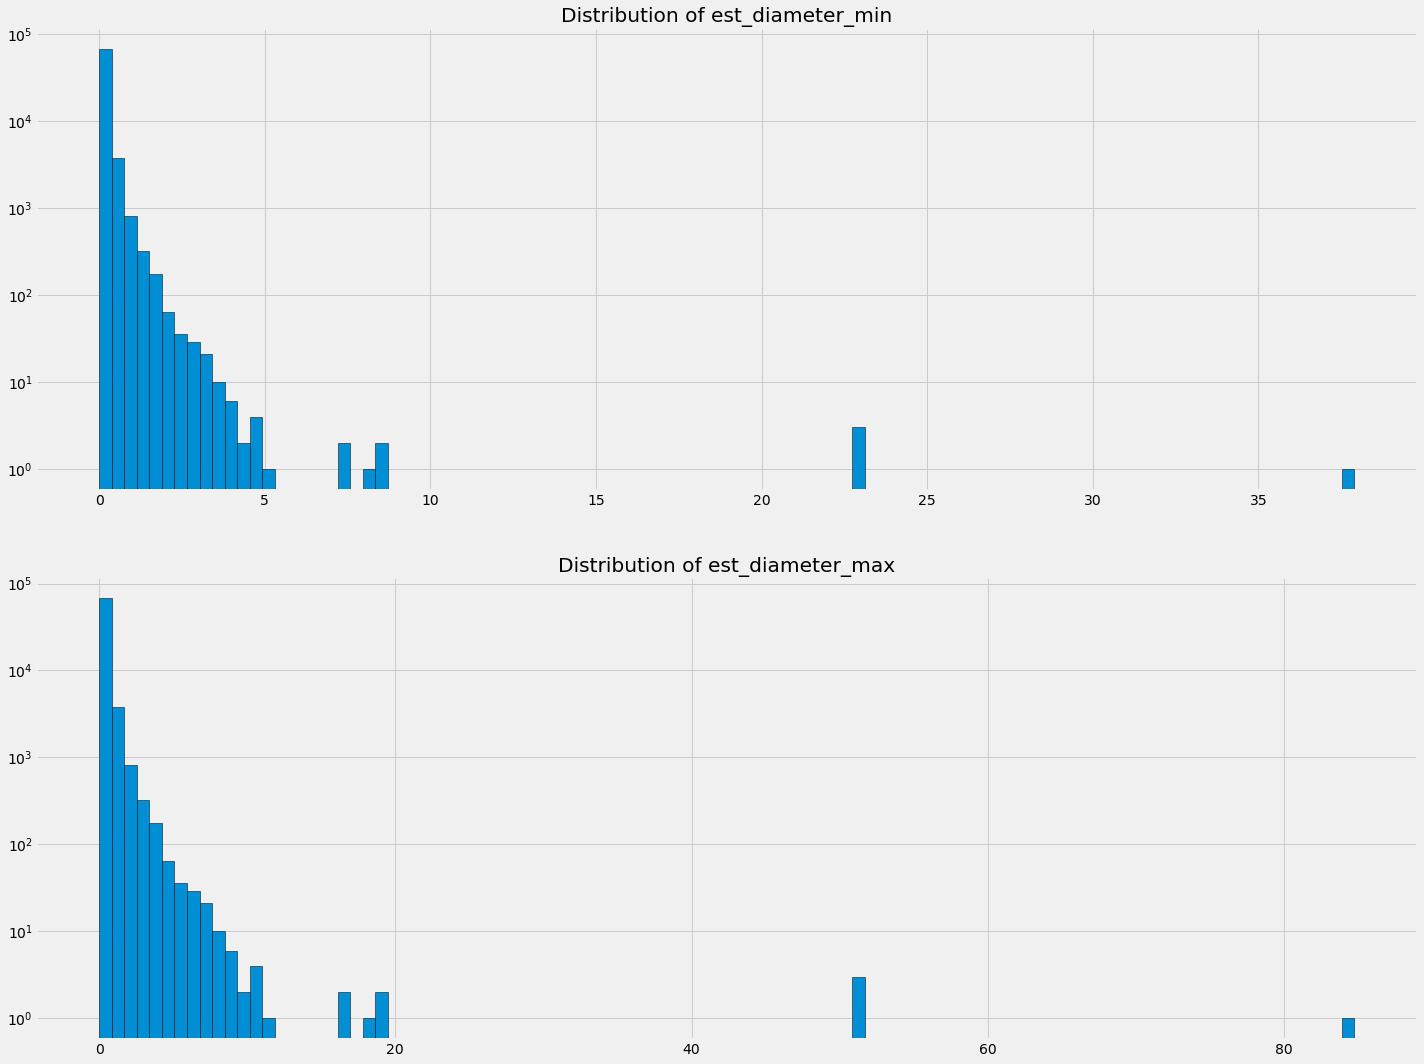

In [112]:
distplot(train, ['est_diameter_min', 'est_diameter_max'], 100, scale=True)


The density of two graphs look very alike, just different scale on the x axis. That's interesting. Let's draw the distribution of the two categories in related to the TARGET variable

In [113]:
def target_kde(df, var):
    plt.figure(figsize = (20, 10))
    # iterate through the sources

    for i, source in enumerate(var):
        # create a new subplot for each source
        plt.subplot(len(var),1,i+1)

        # DO NOT USE HUE BECAUSE THE DENSITY OF THE VARIABLE WILL BE COMPARED WITH THE WHOLE DATASET, 
        # NOT WITH EACH CLASS OF THE TARGET VARIABLE
        
        # plot repaid loans
        sns.kdeplot(x=df[df['TARGET'] == 0][source], label='target == 0')

        # plot loans that were not repaid
        sns.kdeplot(x=df[df['TARGET'] == 1][source], label='target == 1')

        # Label the plots
        plt.title(f'Distribution of {source} by Target Value')
        plt.legend()
        
    plt.tight_layout(h_pad = 3.5)


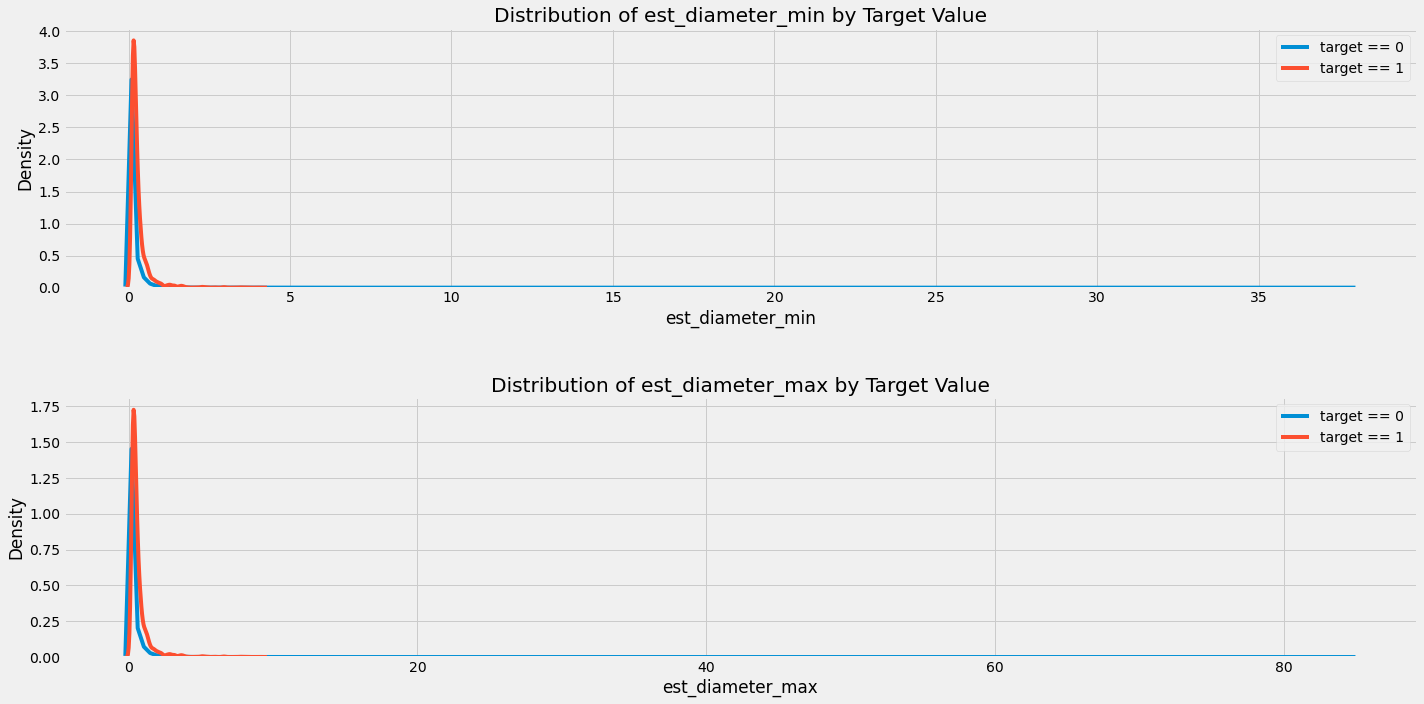

In [114]:
target_kde(train, ['est_diameter_min', 'est_diameter_max'])

It is really interesting that the larger the diameter estimation for both features, the safest. So only objects with a reasonable small will hit the Earth. It is reasonable because the number of small objects should be more than those of large objects. 

The correlation is really weak. Let's check the correlation for all other variables.

### Correlations

- 00-.19 “very weak”
- 20-.39 “weak”
- 40-.59 “moderate”
- 60-.79 “strong”
- 80-1.0 “very strong”

In [115]:
# Find correlations with the target and sort
correlations  = train.corr()['TARGET'].sort_values(ascending=False)
correlations

TARGET                1.000000
relative_velocity     0.188468
est_diameter_max      0.172543
est_diameter_min      0.172543
miss_distance         0.043163
id                   -0.123494
absolute_magnitude   -0.363863
sentry_object              NaN
Name: TARGET, dtype: float64

By far, absolute_magniture and relative_velocity have the strongest correlation with TARGET. Let's plot the kdeplot for those two variables.

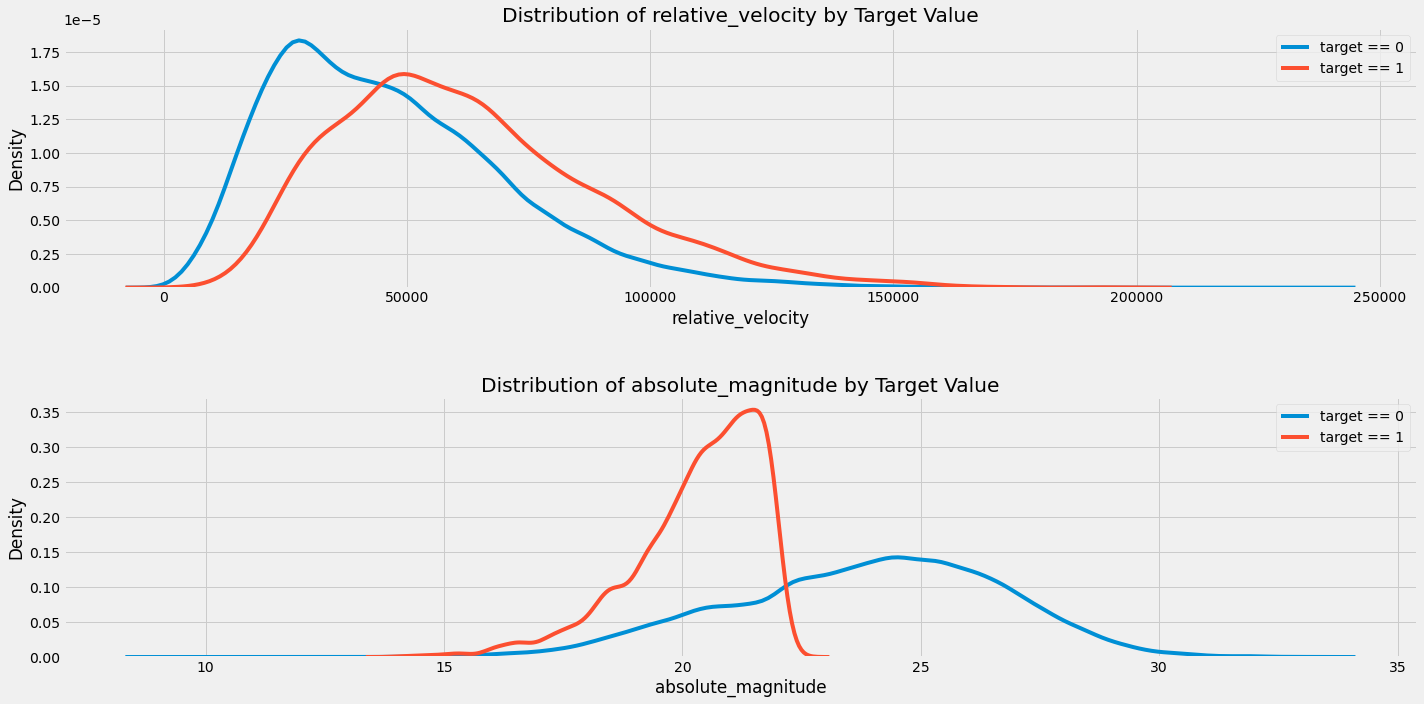

In [116]:
target_kde(train, ['relative_velocity', 'absolute_magnitude'])

The correlation between `relative_velocity` and TARGET is still pretty weak. However, the correlation between `absolute_magnitude` is observable. `absolute_magnitude` describes the stars' brightness. The larger the number, the dimmer the objects. The closer the objects, the brighter. It is reasonable that stars with lower `absolute_magnitude` (closer) is more hazardous

The final feature to consider is miss_distance

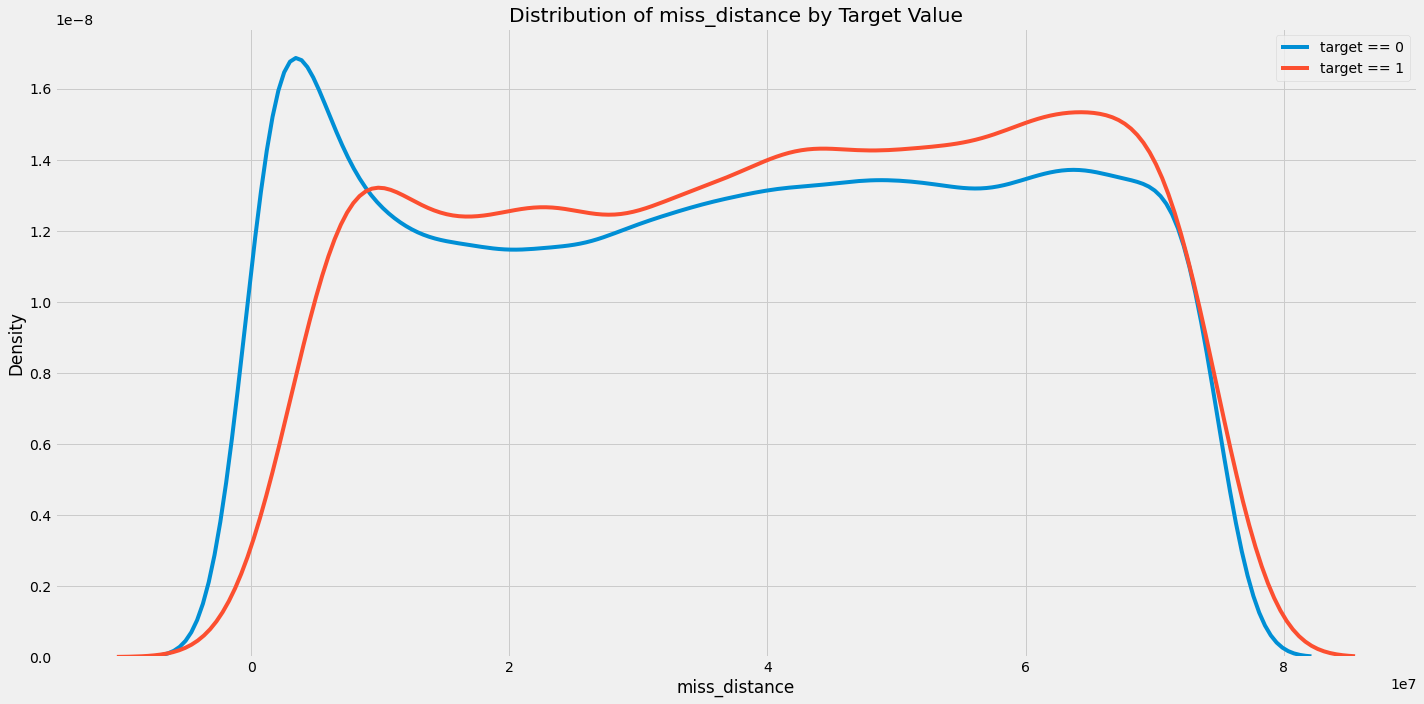

In [117]:
target_kde(train, ['miss_distance'])

Try creating polynomial features

In [118]:
# Make a new dataframe for polynomial features
poly_features = train[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude' ]]
poly_target = train['TARGET']

# Create the polynomial object with specified degree
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=3)

# Shape of the dataframes
print(f'Poly_features Shape: {poly_features.shape}')

Poly_features Shape: (72668, 5)


In [119]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)

# Shape of the dataframes
print(f'Shape of poly_features: {poly_features.shape}')

Shape of poly_features: (72668, 56)


In [120]:
poly_transformer.get_feature_names(['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude'])[:15]

['1',
 'est_diameter_min',
 'est_diameter_max',
 'relative_velocity',
 'miss_distance',
 'absolute_magnitude',
 'est_diameter_min^2',
 'est_diameter_min est_diameter_max',
 'est_diameter_min relative_velocity',
 'est_diameter_min miss_distance',
 'est_diameter_min absolute_magnitude',
 'est_diameter_max^2',
 'est_diameter_max relative_velocity',
 'est_diameter_max miss_distance',
 'est_diameter_max absolute_magnitude']

In [121]:
# Create a dataframe of the polynomial features
poly_features = pd.DataFrame(poly_features, 
columns = poly_transformer.get_feature_names(['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']))

# Add in the target variable
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print('Most negative correlations:\n', poly_corrs.head(10))
print('\nMost positive correlations:\n', poly_corrs.tail(10))

# Shape of the new dataframe
print(f'Shape of poly_features: {poly_features.shape}')

Most negative correlations:
 est_diameter_min miss_distance^2                    -0.004843
est_diameter_max miss_distance^2                    -0.004843
est_diameter_min miss_distance absolute_magnitude   -0.004068
est_diameter_max miss_distance absolute_magnitude   -0.004068
est_diameter_min miss_distance                      -0.003618
est_diameter_max miss_distance                      -0.003618
est_diameter_min absolute_magnitude^2               -0.003079
est_diameter_max absolute_magnitude^2               -0.003079
est_diameter_min relative_velocity miss_distance    -0.003003
est_diameter_max relative_velocity miss_distance    -0.003003
Name: TARGET, dtype: float64

Most positive correlations:
 absolute_magnitude^2                      0.001873
absolute_magnitude                        0.002063
relative_velocity                         0.002071
relative_velocity absolute_magnitude^2    0.002198
relative_velocity absolute_magnitude      0.002286
relative_velocity^2 absolute_magnitud

# Prepare the data

In [218]:
# Get a copy of the data
target = earth_train['TARGET'].astype(int)
train = earth_train.drop('TARGET', axis=1)

### Data Cleaning

In [219]:
def remove_outlier(df):
    print(f'Original Shape: {df.shape}')
    df = df.drop(list(df[df['est_diameter_min']>6].index))
    df = df.drop(list(df[df['est_diameter_max']>15].index))
    print(f'New shape: {df.shape}')
    

In [220]:
# Remove outlier in est_diameter_min and est_diameter_max
remove_outlier(train)

Original Shape: (72668, 9)
New shape: (72659, 9)


### Feature Selection

In [221]:
train = train.drop(columns=['id', 'name', 'orbiting_body', 'sentry_object'])

### Feature Engineering

### Feature Scaling

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_names = list(train.columns)
train = scaler.fit_transform(train)

### Shortlist Promising Models

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

log_reg = LogisticRegression()
naive = GaussianNB()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

models = [log_reg, naive, tree, forest, svc, knn]
for model in models:
    model.fit(train, target)

In [247]:
dictionary = {
    log_reg: 'LogisticRegression',
    naive: 'GaussianNB',
    tree: 'DecisionTreeClassifier',
    forest: 'RandomForestClassifier',
    svc: 'SVC',
    knn: "KNeighborsClassifier"
}

In [ ]:
from sklearn.model_selection import cross_val_score
mean_score = []
std = []
for model in models:
    score = cross_val_score(model, train, target, scoring='f1', cv=10, n_jobs=-1)
    mean_score.append(score.mean())
    std.append(score.std())

Text(0.5, 1.0, 'Mean Score by Models')

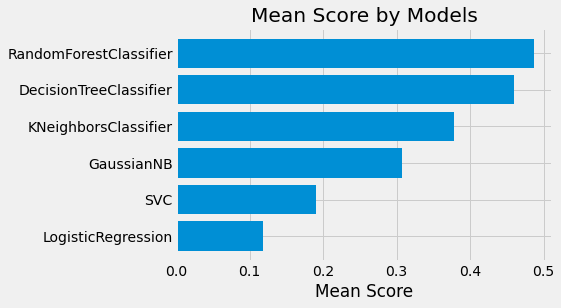

In [320]:
# Create a sorted dataframe
df = pd.DataFrame(mean_score, index=list(dictionary.values()), columns=['mean_score'])
df['std'] = std
df = df.sort_values(by='mean_score', ascending=False)

# Plot the mean score
plt.barh(df.index, df['mean_score'])
plt.gca().invert_yaxis()
plt.xlabel('Mean Score')
plt.title('Mean Score by Models')

In [323]:
feature_importances_values = forest.feature_importances_
feature_importances = pd.DataFrame({'feature': train_names, 'importance': feature_importances_values})
feature_importances

,feature,importance
0,est_diameter_min,0.147134
1,est_diameter_max,0.144163
2,relative_velocity,0.266397
3,miss_distance,0.298307
4,absolute_magnitude,0.143999


In [328]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 

    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
    
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
    """
    # Sort features according to importance
    df = df.sort_values(by='importance', ascending=False)

    # Normalize the feature importances to add up to one
    df['importance_normalized']=df['importance']/df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize=(10,6))
    ax = plt.subplot()
    ax.barh(df['feature'].head(15), df['importance_normalized'].head(15), align = 'center', edgecolor = 'k')
    ax.invert_yaxis()

    # Plot labeling
    plt.xlabel('Normalized Importance') 
    plt.title('Feature Importances')
    
    return df

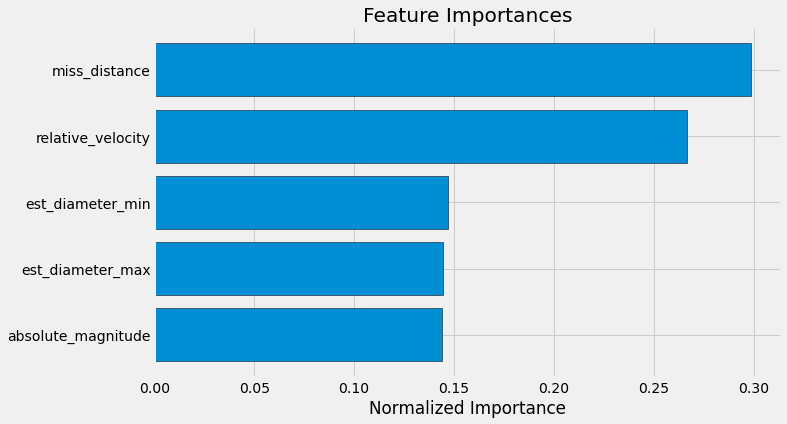

In [329]:
feature_importances_forest = plot_feature_importances(feature_importances)

It's really interesting because `absolute_magnitude` has the strongest correlation with the target variable; however, it is the least important feature.